# Using ML predict if customer will or will not Subsribe to a Term Deposit

My task here is to recommend the marketing team a better set of possible customers to focus on who have higher chance of becoming clients to given scheme. Inorder to achieve that, I need to train my ML algorithm on given dataset and train a model based on mapping of input features and target output, which in our case is given set of input feature vectors does a client buy a Term Deposit or Not.

One thing needs to be clear before we proceed ahead is that our problem statement is a Classification problem, where given training sample we tunned our model to test on unknown samples.

I will be breaking the entire working into following stages:

1] Feature Engineering or Undestanding the feature Set

2] Repair my dataset for any breakdowns or missing values in dataset

3] Decide on important features to be used for processing
   (tunning required/ high end could be either using PCA/SVD for top features selection before Hyperparameter Selection)
   
4] Decide on an ML algo for training our Model

5] Testing the model

6] Parameter tuning for more accurate results.

Lets start by importing packages and libraries for graph display, I use %inline to show graph in same notebook window

In [2]:
import numpy as np
import sklearn
import pickle
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

Time to load our dataset using Pandas which a great for carrying out data Exploratory task



In [3]:
df = pd.read_csv('marketing_dataset.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


As given in Problem statement, we can see we got 21 feature variables,
with 20 features are inputs while 21st feature is our output feature.

As I studied closely, not all features are of use to us and hence can be eliminated to avoid model overfitting

I am planning to drop following features from our dataset =====> 'default','contact','duration','month','day_of_week','pdays'

In [4]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [5]:
#updated dataframe below
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,2,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,4,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,1,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,unknown,unknown,3,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,1,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Graphs Talk alot about the power of data than numerical figures, so lets plot some graphs on our data

1] Let me begin with 1st categorial Feature which is job

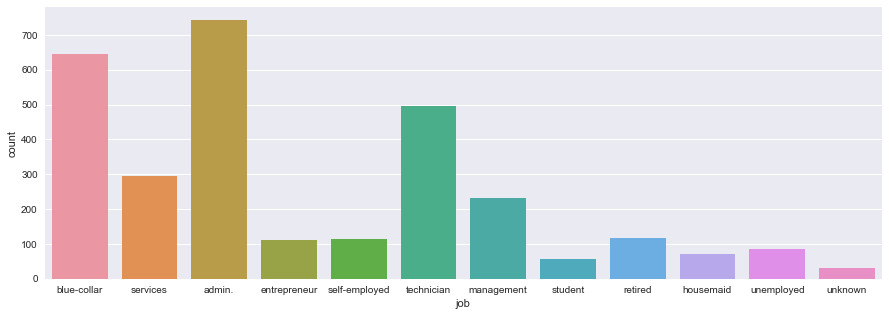

In [6]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x='job',data=df)

2] Now we check marital status of our Potential clients and thier distribution in dataset

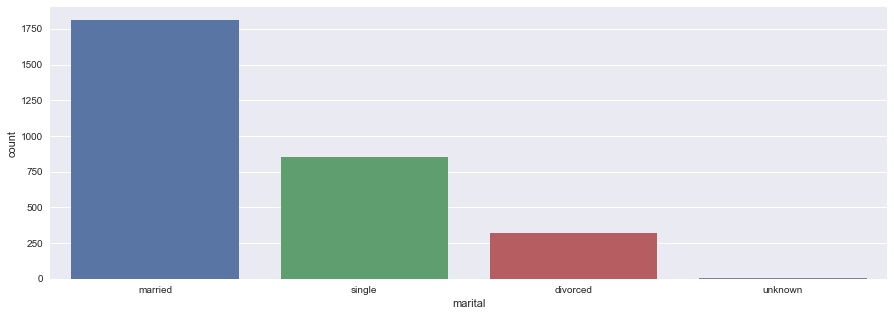

In [7]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x='marital',data=df)

3] Though Job and Education are highly collinear inputs, let us yet check distribution of education too in our data

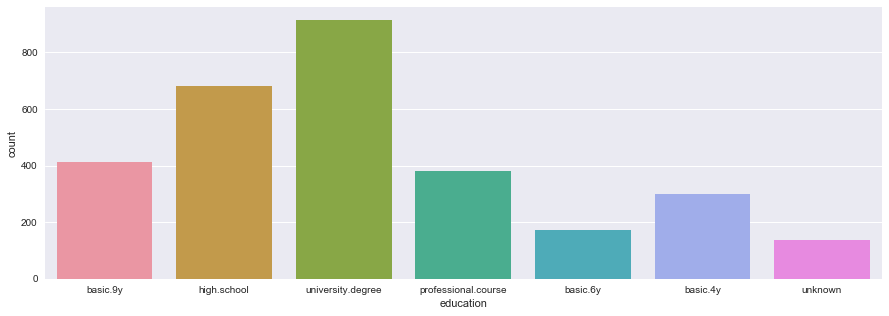

In [8]:
sns.countplot(x='education',data=df)

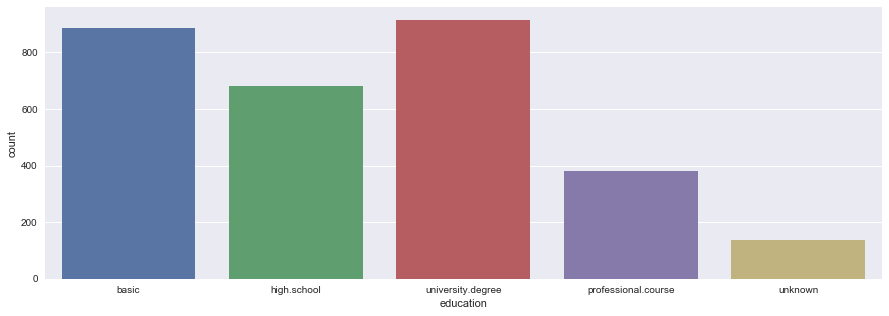

In [9]:
# To avoid confusion in understanding basic we can combine all basics into just one basic type
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)
sns.countplot(x='education',data=df)

Finally, Let us plot % of Customers who said no to Term Deposit to ones who said Yes in our dataset and it seems we have more negative distribution than positive (uneven distribution), which is not good

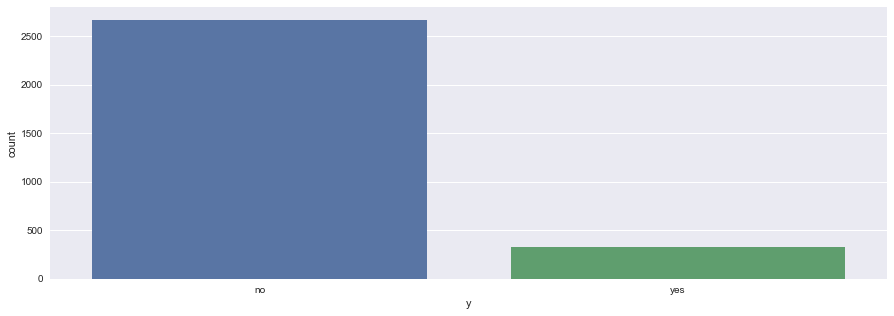

In [10]:
sns.countplot(x='y', data=df)

Before we now Jump into ML training, we need to make sure we dont have more null inputs and at same time, few of our features are categorical, hence need to be converted into numerical feature set

In [11]:
df.isnull()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


that is great, looks like we dont have any null values, so we can proceed to converting categorial values to numerical using LabelEncoder

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


SKLPP = preprocessing.LabelEncoder()
#THEN COVERTING SPECIFIC CATEGORIAL COLUMNS TO VALUES
df.job = SKLPP.fit_transform(df.job)
df.marital = SKLPP.fit_transform(df.marital)
df.education = SKLPP.fit_transform(df.education)
df.housing = SKLPP.fit_transform(df.housing)
df.loan = SKLPP.fit_transform(df.loan)
df.poutcome = SKLPP.fit_transform(df.poutcome)

In [13]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,0,2,0,2,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,7,2,1,0,0,4,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,25,7,1,1,2,0,1,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,38,7,1,0,1,1,3,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,47,0,1,3,2,0,1,0,1,-0.1,93.200,-42.0,4.191,5195.8,no


So now, we are all set for training our model, a final step before that is creating, training and test datasets.

As per standard procedure we follow a 80-20 split, where 80% data is assigned to training sample and 20% to testing and evaluation.

In [14]:
from sklearn import model_selection
# We need to specify which columns of dataset will be used for input training and which will be used as labels for output.
df.shape

(2999, 15)

In [15]:
X = df.iloc[:,0:14]
X.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,1,1,0,2,0,2,0,1,-1.8,92.893,-46.2,1.313,5099.1
1,39,7,2,1,0,0,4,0,1,1.1,93.994,-36.4,4.855,5191.0
2,25,7,1,1,2,0,1,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,7,1,0,1,1,3,0,1,1.4,94.465,-41.8,4.959,5228.1
4,47,0,1,3,2,0,1,0,1,-0.1,93.200,-42.0,4.191,5195.8


In [16]:
Y = df.iloc[:,14]
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [17]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

Let us verify the shape of our training data


In [18]:
x_train.shape, y_train.shape

((2399, 14), (2399,))

and  testing data

In [19]:
x_test.shape, y_test.shape


((600, 14), (600,))

# Machine Learning Algorithm training

The most important task here is to decide, which algorithm is right for our need, there is no1 algorithm which we can call as best. As every algorithm is best in different situation.

Given a Supervised Situation, where we need to run a Classification model, several algorithms come to my mind,

1] Naive Bayes

2] Decision tree

3] Logistic Regression

4] Random Forest

5] Support Vector Machine

6] Neural Networks

The best way to decide which algorithm performs best in our case is to run all of these algorithms and select one with highest accuracy. However, I would short list a few which I feel will perform great or which wont,
Neural Network always are great to learn at granular level and outperform most generic algorithms however they need huge training data with high diversity. As our training data looks a bit baised towards  'no' class, I feel it wont be ideal to use neural network, same would apply for random forest as data is more baised towards 'no' class, picking a sample of data and training a model on it can lead to cases where 90% of data happens to have just one class and very few chance for your model to generalize leading to high chances of model overfitting.

So I would give my best chance on Logistic Regression, or Decision Tree or SVM, and I personally feel SVm would be great choice as it is suited to work by considering bordering conditions by constructing Support Vectors, and at same time it can handle non-linear data too, thus leading to more robust decisions. Let us try all this different algos,

# SVM

In [20]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
pred = clf.predict(x_test)

In [22]:
#Calculating accuracy for given predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8966666666666666

We get an 89.6 which is almost 90% accuracy using SVM which is great, Yet the accuracy can be even more increased by creating a superclassifier, which in simple layman terms is like combination of multiple simple classifiers like SVM, DECISION TREE, RANDOM FOREST, NAIVE BAYES and then giving output which was given by majority of the classifiers.

Let us try here with different Classification ALgorithms too:

# LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l1', max_iter=100)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
prediction=model.predict(x_test)

In [53]:
accuracy_score(y_test, prediction)

0.91

Woow!! we get an Suprising Accuracy of 91% using LOGISTIC REGRESSION, which is higher than SVM

# RANDOM FOREST

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

C:\Users\sugat\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)

In [56]:
accuracy_score(y_test, predict)

0.8916666666666667

As per my assumption, Neural Network wont perform great given the small amount of data, yet let us prove the point

# Neural Network

In [57]:
from keras.models import Sequential
from keras.layers import Dense

C:\Users\sugat\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [58]:
model = Sequential()
model.add(Dense(10, input_dim=14, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
y_test.head()

311     no
1025    no
1586    no
2940    no
2979    no
Name: y, dtype: object

Need to convert Labels to int type

In [70]:
y_test = y_test.replace('no',0)
y_test = y_test.replace('yes',1)

In [71]:
y_test.head()

311     0
1025    0
1586    0
2940    0
2979    0
Name: y, dtype: int64

In [72]:
y_train = y_train.replace('no',0)
y_train = y_train.replace('yes',1)

In [73]:
y_train.head()

1521    0
1473    0
731     0
271     0
1509    0
Name: y, dtype: int64

In [74]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
#print(x_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [75]:
x_train_keras.dtype
y_train_keras.dtype

dtype('int64')

In [77]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=50, batch_size=128, shuffle=True)

Epoch 1/50
2399/2399 [==============================] - 0s 13us/step - loss: 0.4300 - acc: 0.8875
Epoch 2/50
2399/2399 [==============================] - 0s 12us/step - loss: 0.4149 - acc: 0.8875
Epoch 3/50
2399/2399 [==============================] - 0s 12us/step - loss: 0.4025 - acc: 0.8875
Epoch 4/50
2399/2399 [==============================] - 0s 15us/step - loss: 0.3928 - acc: 0.8875
Epoch 5/50
2399/2399 [==============================] - 0s 15us/step - loss: 0.3849 - acc: 0.8875
Epoch 6/50
2399/2399 [==============================] - 0s 12us/step - loss: 0.3784 - acc: 0.8875
Epoch 7/50
2399/2399 [==============================] - 0s 12us/step - loss: 0.3733 - acc: 0.8875
Epoch 8/50
2399/2399 [==============================] - 0s 12us/step - loss: 0.3691 - acc: 0.8875
Epoch 9/50
2399/2399 [==============================] - 0s 15us/step - loss: 0.3657 - acc: 0.8875
Epoch 10/50
2399/2399 [==============================] - 0s 14us/step - loss: 0.3631 - acc: 0.8875
Epoch 11/50
2399/23

In [78]:
scores = model.evaluate(np.array(x_test), np.array(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

600/600 [==============================] - 0s 153us/step

acc: 89.83%
